In [144]:
import sys
sys.modules.pop('CLASS_BABY')
sys.modules.pop('CLASS_SAMPLE')


from CLASS_BABY import *
from CLASS_SAMPLE import *

import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

# Create the SAMPLE object with all of the babies in it

In [145]:
BABIES = SAMPLE(NAMES_COMPLETE)

NO MEASUREMENTS FOR BABY FMC056
NO MEASUREMENTS FOR BABY FMC060


Listing all of the available properties to choose just the one I want to save in the file txt

In [146]:
# Just to have the auto-completion on b
# and to list the properties available
b = baby('FMC003')

In [147]:
list(b.__dict__)

['verbose',
 'warning',
 'baby_id',
 'data_found',
 'original_name',
 'incomplete',
 'gender',
 'weight_grams',
 'gestational_age_days',
 'delivery',
 'date_time',
 'date_birth',
 'time_birth',
 'year_birth',
 'month_birth',
 'day_birth',
 'hours_birth',
 'minutes_birth',
 'seconds_birth',
 'birth',
 'pr_threshold',
 'spo2_threshold',
 'files',
 'measurements',
 'measurements_date',
 'measurements_time',
 'measurements_datetime',
 'measurements_delta_sec_since_birth',
 'measurements_SpO2_median',
 'measurements_PR_median',
 'measurements_PI_median',
 'measurements_SpO2_mean',
 'measurements_PR_mean',
 'measurements_SpO2_std',
 'measurements_PR_std',
 'measurements_bradycardia_sec_pr',
 'measurements_bradycardia_ratio_pr',
 'measurements_bradycardia_sec_spo2',
 'measurements_bradycardia_ratio_spo2',
 'measurements_bradycardia_sec_pr_dynamic',
 'measurements_bradycardia_ratio_pr_dynamic',
 'good_datetime',
 'measurements_wrist',
 'measurements_foot',
 'measurements_PHN',
 'has_been_PHN']

In [148]:
b.measurements_bradycardia_sec_pr[0]

[454.0, 0.0, 0.0, 0.0, 0.0]

## Creating the numpy arrays that I want to save for all the measurements

In [149]:
BABY_IDS = []
GENDER = []
WEIGHT_GRAMS = []
GEST_AGE_DAYS = []
DELIVERY = []
BIRTH_DATE = []
FILE = []
DELTA_SEC_MEASURE = []
MED_SPO2 = []
MED_PR = []
MED_PI = []
PHN = []
WRIST = []
FOOT = []
BRADY_SEC_PR = []
BRADY_RATIO_PR = []
BRADY_RATIO_PR_m10 = []
BRADY_RATIO_PR_m20 = []
BRADY_RATIO_PR_m30 = []
BRADY_RATIO_PR_m40 = []


BRADY_SEC_SPO2 = []
BRADY_RATIO_SPO2 = []
BRADY_SEC_PR_DYN = []
BRADY_RATIO_PR_DYN = []


for b in BABIES.babies:
    for j in range(len(b.measurements)):
        BABY_IDS.append(str(b.baby_id))
        GENDER.append(str(b.gender))
        WEIGHT_GRAMS.append(float(b.weight_grams))
        GEST_AGE_DAYS.append(float(b.gestational_age_days))
        DELIVERY.append(str(b.delivery))
        BIRTH_DATE.append(str(b.birth))
        FILE.append(str(b.files[j]))
        DELTA_SEC_MEASURE.append(float(b.measurements_delta_sec_since_birth[j]))
        MED_SPO2.append(float(b.measurements_SpO2_median[j]))
        MED_PR.append(float(b.measurements_PR_median[j]))
        try:
            MED_PI.append(float(b.measurements_PI_median[j]))
        except:
            MED_PI.append(np.nan)
        PHN.append(bool(b.measurements_PHN[j]))
        WRIST.append(bool(b.measurements_wrist[j]))
        FOOT.append(bool(b.measurements_foot[j]))
        BRADY_SEC_PR.append(float(b.measurements_bradycardia_sec_pr[j][0]))
        
        BRADY_RATIO_PR.append(float(b.measurements_bradycardia_ratio_pr[j][0]))
        BRADY_RATIO_PR_m10.append(float(b.measurements_bradycardia_ratio_pr[j][1]))
        BRADY_RATIO_PR_m20.append(float(b.measurements_bradycardia_ratio_pr[j][2]))
        BRADY_RATIO_PR_m30.append(float(b.measurements_bradycardia_ratio_pr[j][3]))
        BRADY_RATIO_PR_m40.append(float(b.measurements_bradycardia_ratio_pr[j][4]))

        
        BRADY_SEC_SPO2.append(float(b.measurements_bradycardia_sec_spo2[j][0]))
        BRADY_RATIO_SPO2.append(float(b.measurements_bradycardia_ratio_spo2[j][0]))
        BRADY_SEC_PR_DYN.append(float(b.measurements_bradycardia_sec_pr_dynamic[j]))
        BRADY_RATIO_PR_DYN.append(float(b.measurements_bradycardia_ratio_pr_dynamic[j]))


In [150]:
BABY_IDS            = np.array(BABY_IDS         )
GENDER              = np.array(GENDER           )
WEIGHT_GRAMS        = np.array(WEIGHT_GRAMS     )
GEST_AGE_DAYS       = np.array(GEST_AGE_DAYS    )
DELIVERY            = np.array(DELIVERY         )
BIRTH_DATE          = np.array(BIRTH_DATE       )
FILE                = np.array(FILE             )
DELTA_SEC_MEASURE   = np.array(DELTA_SEC_MEASURE)
MED_SPO2            = np.array(MED_SPO2         )
MED_PR              = np.array(MED_PR           )
MED_PI              = np.array(MED_PI           )
PHN                 = np.array(PHN              )
WRIST               = np.array(WRIST            )
FOOT                = np.array(FOOT             )
BRADY_SEC_PR        = np.array(BRADY_SEC_PR     )
BRADY_RATIO_PR      = np.array(BRADY_RATIO_PR   )
BRADY_RATIO_PR_m10  = np.array(BRADY_RATIO_PR_m10)
BRADY_RATIO_PR_m20  = np.array(BRADY_RATIO_PR_m20)
BRADY_RATIO_PR_m30  = np.array(BRADY_RATIO_PR_m30)
BRADY_RATIO_PR_m40  = np.array(BRADY_RATIO_PR_m40)

BRADY_SEC_SPO2      = np.array(BRADY_SEC_SPO2   )
BRADY_RATIO_SPO2    = np.array(BRADY_RATIO_SPO2 )
BRADY_SEC_PR_DYN    = np.array(BRADY_SEC_PR_DYN )
BRADY_RATIO_PR_DYN  = np.array(BRADY_RATIO_PR_DYN)




In [151]:
len(np.unique(BABY_IDS))

267

In [152]:
# Checking how many occurrence I have for FMC005
# it should be the same number of the files for that baby
FMC005 = baby('FMC005')
print('Files for FMC005: \n',FILE[np.where(BABY_IDS=='FMC005')])
print('Number of files for FMC005: ',len(FMC005.files))
print('Number of occurrence in the numpy array of FMC005: ',len(FILE[np.where(BABY_IDS=='FMC005')]))

Files for FMC005: 
 ['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_005/G_FMC005_Day2_Lt Foot.csv'
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_005/G_FMC005_Day2_Rt wrist.csv'
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_005/G_PHN_FMC005_Day5_Rt Foot.csv'
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_005/G_PHN_FMC005_Day5_Rt wrist.csv']
Number of files for FMC005:  4
Number of occurrence in the numpy array of FMC005:  4


Creating a matrix with all the numpy array that I want to save

In [153]:
mat = np.array([BABY_IDS,GENDER,
                WEIGHT_GRAMS,
                GEST_AGE_DAYS,
                DELIVERY,
                BIRTH_DATE,
                FILE,
                DELTA_SEC_MEASURE,
                MED_SPO2,
                MED_PR,
                MED_PI,
                PHN,
                WRIST,
                FOOT,
                BRADY_SEC_PR,
                BRADY_RATIO_PR,
                BRADY_RATIO_PR_m10,
                BRADY_RATIO_PR_m20,
                BRADY_RATIO_PR_m30,
                BRADY_RATIO_PR_m40,

                BRADY_SEC_SPO2,
                BRADY_RATIO_SPO2,
                BRADY_SEC_PR_DYN,
                BRADY_RATIO_PR_DYN])

Creating a pandas DataFrame

In [154]:
cols = ['BABY_IDS',
        'GENDER',
        'WEIGHT_GRAMS',
        'GEST_AGE_DAYS',
        'DELIVERY',
        'BIRTH_DATE',
        'FILE',
        'DELTA_SEC_MEASURE',
        'MED_SPO2',
        'MED_PR',
        'MED_PI',
        'PHN',
        'WRIST',
        'FOOT',
        'BRADY_SEC_PR',
        'BRADY_RATIO_PR',
        'BRADY_RATIO_PR_m10',
        'BRADY_RATIO_PR_m20',
        'BRADY_RATIO_PR_m30',
        'BRADY_RATIO_PR_m40',
        
        'BRADY_SEC_SPO2',
        'BRADY_RATIO_SPO2',
        'BRADY_SEC_PR_DYN',
        'BRADY_RATIO_PR_DYN']

BABY_AVG_PROP = pd.DataFrame(mat.T,columns=cols,)

## Saving the PANDAS DataFrame

In [155]:
BABY_AVG_PROP.to_csv('../TOST_data/average_properties.txt',sep='\t',header=cols,na_rep=-99)

# Reading the PANDAS DataFrame (specyfing the float columns)

In [131]:
READBABY = pd.read_csv('../TOST_data/average_properties.txt',
            sep='\t',index_col=0,na_values=-99,
            dtype={'WEIGHT_GRAMS': float,
                   'GEST_AGE_DAYS':float,
                   'DELTA_SEC_MEASURE':float,
                   'MED_SPO2':float,
                   'MED_PI':float,
                   'MED_PR':float,
                   'BRADY_SEC_PR':float,
                   'BRADY_RATIO_PR':float,
                   'BRADY_RATIO_PR_m10':float,
                   'BRADY_RATIO_PR_m20':float,
                   'BRADY_RATIO_PR_m30':float,
                   'BRADY_RATIO_PR_m40':float,
                   'BRADY_SEC_SPO2':float,
                   'BRADY_RATIO_SPO2':float,
                   'BRADY_SEC_PR_DYN':float,
                   'BRADY_RATIO_PR_DYN':float})

## Example usage for string property

In [44]:
READBABY[(READBABY['GENDER']=='Female')]

,BABY_IDS,GENDER,WEIGHT_GRAMS,GEST_AGE_DAYS,DELIVERY,BIRTH_DATE,FILE,DELTA_SEC_MEASURE,MED_SPO2,MED_PR,MED_PI,PHN,WRIST,FOOT,BRADY_SEC_PR,BRADY_RATIO_PR,BRADY_SEC_SPO2,BRADY_RATIO_SPO2,BRADY_SEC_PR_DYN,BRADY_RATIO_PR_DYN
5,FMC005,Female,3510.0,273.0,Csection,2014-03-03 13:17:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,156275.0,96.0,148.0,0.7,False,False,True,18.0,0.034351,134.0,0.255725,0.0,0.000000
6,FMC005,Female,3510.0,273.0,Csection,2014-03-03 13:17:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,156207.0,94.0,134.0,0.8,False,True,False,276.0,0.051054,752.0,0.139105,0.0,0.000000
7,FMC005,Female,3510.0,273.0,Csection,2014-03-03 13:17:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,353779.0,97.0,115.0,0.6,True,False,True,726.0,0.714567,0.0,0.000000,0.0,0.000000
8,FMC005,Female,3510.0,273.0,Csection,2014-03-03 13:17:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,353483.0,97.0,118.0,0.5,True,True,False,724.0,0.552672,10.0,0.007634,0.0,0.000000
9,FMC006,Female,3420.0,280.0,vaginal,2014-03-04 09:39:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,20358.0,99.0,108.0,0.6,False,False,True,608.0,0.891496,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,RGH70,Female,3520.0,280.0,vaginal,2015-01-13 15:20:00,/home/giorgio/Desktop/NHS/TOST_data/TOST RGH D...,63711.0,96.0,127.0,1.2,False,True,False,1032.0,0.186147,306.0,0.055195,8.0,0.001443
760,RGH073,Female,3610.0,287.0,vaginal,2015-01-25 15:38:00,/home/giorgio/Desktop/NHS/TOST_data/TOST RGH D...,67963.0,100.0,127.0,1.7,False,False,True,162.0,0.262136,0.0,0.000000,0.0,0.000000
761,RGH073,Female,3610.0,287.0,vaginal,2015-01-25 15:38:00,/home/giorgio/Desktop/NHS/TOST_data/TOST RGH D...,67976.0,98.0,118.0,1.4,False,True,False,3062.0,0.567037,126.0,0.023333,14.0,0.002593
762,RGH074,Female,3440.0,274.0,vaginal,2015-01-26 18:20:00,/home/giorgio/Desktop/NHS/TOST_data/TOST RGH D...,51427.0,100.0,124.0,1.4,False,False,True,36.0,0.055215,0.0,0.000000,0.0,0.000000


## Example usage for float property

In [15]:
READBABY[READBABY['WEIGHT_GRAMS']>1000.]

,BABY_IDS,GENDER,WEIGHT_GRAMS,GEST_AGE_DAYS,DELIVERY,BIRTH_DATE,FILE,DELTA_SEC_MEASURE,MED_SPO2,MED_PR,MED_PI,PHN,WRIST,FOOT,BRADY_SEC_PR,BRADY_RATIO_PR,BRADY_SEC_SPO2,BRADY_RATIO_SPO2,BRADY_SEC_PR_DYN,BRADY_RATIO_PR_DYN
0,FMC003,Male,3775.0,280.0,vaginal,2014-03-03 18:25:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,58400.0,99.0,117.0,NaN,False,False,True,454.0,0.685801,0.0,0.000000,0.0,0.000000
1,FMC003,Male,3775.0,280.0,vaginal,2014-03-03 18:25:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,58499.0,94.0,113.0,0.7,False,True,False,3112.0,0.794283,1274.0,0.325166,1030.0,0.262889
2,FMC003,Male,3775.0,280.0,vaginal,2014-03-03 18:25:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,152294.0,94.0,112.0,1.2,True,False,True,1322.0,0.758898,366.0,0.210103,394.0,0.226177
3,FMC003,Male,3775.0,280.0,vaginal,2014-03-03 18:25:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,152212.0,90.0,115.0,1.2,True,True,False,1482.0,0.718023,572.0,0.277132,84.0,0.040698
4,FMC004,Male,3420.0,279.0,vaginal,2014-03-03 17:51:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,65813.0,99.0,121.0,0.5,False,False,True,256.0,0.400000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,RGH072,Male,3880.0,287.0,vaginal,2015-01-22 15:47:00,/home/giorgio/Desktop/NHS/TOST_data/TOST RGH D...,62047.0,95.0,124.0,1.5,False,True,False,1728.0,0.324690,110.0,0.020669,52.0,0.009771
760,RGH073,Female,3610.0,287.0,vaginal,2015-01-25 15:38:00,/home/giorgio/Desktop/NHS/TOST_data/TOST RGH D...,67963.0,100.0,127.0,1.7,False,False,True,162.0,0.262136,0.0,0.000000,114.0,0.184466
761,RGH073,Female,3610.0,287.0,vaginal,2015-01-25 15:38:00,/home/giorgio/Desktop/NHS/TOST_data/TOST RGH D...,67976.0,98.0,118.0,1.4,False,True,False,3062.0,0.567037,126.0,0.023333,452.0,0.083704
762,RGH074,Female,3440.0,274.0,vaginal,2015-01-26 18:20:00,/home/giorgio/Desktop/NHS/TOST_data/TOST RGH D...,51427.0,100.0,124.0,1.4,False,False,True,36.0,0.055215,0.0,0.000000,0.0,0.000000


In [16]:
np.array(READBABY)

array([['FMC003', 'Male', 3775.0, ..., 0.0, 0.0, 0.0],
       ['FMC003', 'Male', 3775.0, ..., 0.32516590096988257, 1030.0,
        0.2628892291985707],
       ['FMC003', 'Male', 3775.0, ..., 0.21010332950631455, 394.0,
        0.2261768082663605],
       ...,
       ['RGH073', 'Female', 3610.0, ..., 0.02333333333333333, 452.0,
        0.0837037037037037],
       ['RGH074', 'Female', 3440.0, ..., 0.0, 0.0, 0.0],
       ['RGH074', 'Female', 3440.0, ..., 0.03746907034287735, 170.0,
        0.030045952633439375]], dtype=object)

In [17]:
READBABY.dtypes['GENDER']

dtype('O')

In [18]:
print(READBABY.dtypes['GENDER'])

object


In [33]:
# example of how to change type
BABY_AVG_PROP.BABY_IDS = BABY_AVG_PROP.BABY_IDS.astype(str)
BABY_AVG_PROP.GEST_AGE_DAYS = BABY_AVG_PROP.GEST_AGE_DAYS.astype(float)
BABY_AVG_PROP.BRADY_RATIO_PR = BABY_AVG_PROP.BRADY_RATIO_PR.astype(float)

In [34]:
# Note that the string type is classified as an object
# Note as well that this is not the table that I am reading with the right types
# but the table that DataFrame that I am writing
print(BABY_AVG_PROP.dtypes)

BABY_IDS              object
GENDER                object
WEIGHT_GRAMS          object
GEST_AGE_DAYS        float64
DELIVERY              object
BIRTH_DATE            object
FILE                  object
DELTA_SEC_MEASURE     object
MED_SPO2              object
MED_PR                object
MED_PI                object
PHN                   object
WRIST                 object
FOOT                  object
BRADY_SEC_PR          object
BRADY_RATIO_PR       float64
BRADY_SEC_SPO2        object
BRADY_RATIO_SPO2      object
dtype: object


## Example plot for the distribution of measurement times since the birth using the txt file just read

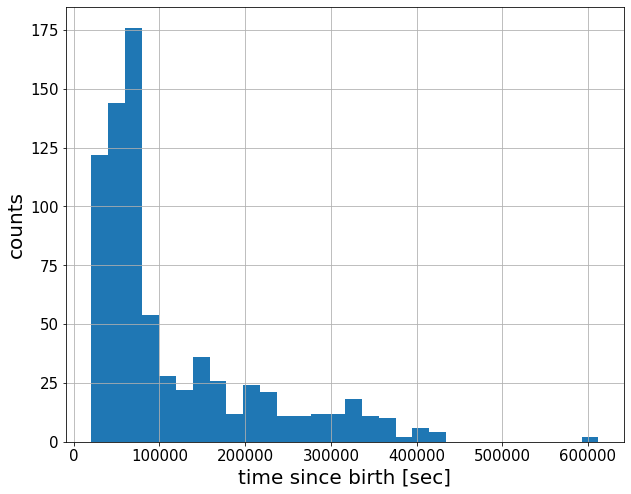

In [35]:
READBABY['DELTA_SEC_MEASURE'].hist(bins=30,figsize=(10,8))
plt.xlabel('time since birth [sec]')
plt.ylabel('counts')
plt.show()

### Double checking we have no babies with time of the measurements before the birth.

In [36]:
READBABY[READBABY['DELTA_SEC_MEASURE']<6*60*60.]
# we have just some babies measured a little bit before 6 hours which is ok (6 hours is just nominal)

,BABY_IDS,GENDER,WEIGHT_GRAMS,GEST_AGE_DAYS,DELIVERY,BIRTH_DATE,FILE,DELTA_SEC_MEASURE,MED_SPO2,MED_PR,MED_PI,PHN,WRIST,FOOT,BRADY_SEC_PR,BRADY_RATIO_PR,BRADY_SEC_SPO2,BRADY_RATIO_SPO2
9,FMC006,Female,3420.0,280.0,vaginal,2014-03-04 09:39:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,20358.0,99.0,108.0,0.6,False,False,True,608.0,0.891496,0.0,0.000000
10,FMC006,Female,3420.0,280.0,vaginal,2014-03-04 09:39:00,/home/giorgio/Desktop/NHS/TOST_data/TOST FMC D...,20285.0,91.0,112.0,0.6,False,True,False,3698.0,0.793903,1590.0,0.341348
246,RGH007,Male,3650.0,280.0,vaginal,2014-04-03 06:54:00,/home/giorgio/Desktop/NHS/TOST_data/TOST RGH D...,21152.0,89.0,117.0,2.0,False,False,True,498.0,0.819079,316.0,0.519737
247,RGH007,Male,3650.0,280.0,vaginal,2014-04-03 06:54:00,/home/giorgio/Desktop/NHS/TOST_data/TOST RGH D...,21103.0,88.0,117.0,NaN,False,True,False,3544.0,0.655568,3472.0,0.642249


In [37]:
# FMC006 minutes before 6 hours
(6.*60*60-20358)/60

20.7

In [38]:
# FMC006 hours after birth
20358.0/60/60

5.655

In [39]:
# 5 hours and 39 minutes
0.655*60

39.300000000000004

In [40]:
# RGH007 hours after birth
21152.0/60/60

5.875555555555556

In [41]:
# 5 hours and 39 minutes
0.87555*60

52.533